In [1]:
# import dependencies here
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# pull in csv file and read into a pandas data frame and clean data frame
players_df = pd.read_csv("Resources/player_data.csv")
clean_df = players_df.loc[(players_df["stolen_bases"] != 'no') & (players_df["batting_average"] != 'no')]
clean_df.head()

,player_id,name,at_bats,runs,hits,runs_batted_in,bases_on_balls,batting_average,doubles,triples,home_runs,stolen_bases,hall_of_fame
0,aardsda01,David Aardsma,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,no
1,aaronha01,Henry Aaron,12364,2174.0,3771.0,2297,1402.0,0.305,624,98,755.0,240,no
2,aaronto01,Tommie Aaron,944,102.0,216.0,94,86.0,0.229,42,6,13.0,9,no
3,aasedo01,Don Aase,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,no
4,abadan01,Andy Abad,21,1.0,2.0,0,4.0,0.095,0,0,0.0,0,no


In [3]:
# convert HOF column to yes/no format
replaced_df = clean_df.replace(to_replace=["P", "C", "1B", "2B", "3B", "SS", "LF", "CF", "RF"], value=["yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes", "yes"])

In [4]:
# Step 1a) Store x and y variables
data = replaced_df
X = data[["at_bats", "runs", "hits", "runs_batted_in",  "bases_on_balls", "doubles", "triples", "home_runs", "stolen_bases"]]

encoded_y = pd.get_dummies(data[["hall_of_fame"]])
clean_y = encoded_y[["hall_of_fame_yes"]]
y = clean_y.rename(columns={"hall_of_fame_yes":"hall_of_fame"})

In [5]:
# Step 2a) split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [6]:
# Step 3a) Scale/normalize data using StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

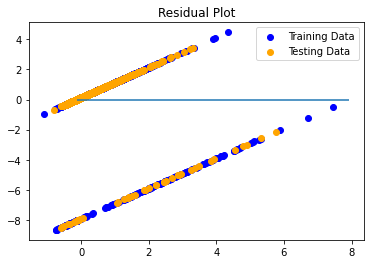

In [7]:
# Step 4a) Plot the results 
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [8]:
# Step 5a) Quanitfy the results
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6146264422519075, R2: 0.21192179700377123


In [9]:
# Step 1b) Create a sequential model
model = Sequential()

In [10]:
# Step 2b) Add the first layer of neural network
number_inputs = 9
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [11]:
# Step 3b) Add the output layer
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Step 4b) Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy', 'mean_squared_error'])

In [17]:
# Step 5b) Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Train on 12275 samples
Epoch 1/1000
12275/12275 - 4s - loss: 0.0150 - acc: 0.9843 - mae: 0.0207
Epoch 2/1000
12275/12275 - 1s - loss: 0.0149 - acc: 0.9843 - mae: 0.0217
Epoch 3/1000
12275/12275 - 2s - loss: 0.0149 - acc: 0.9843 - mae: 0.0214
Epoch 4/1000
12275/12275 - 2s - loss: 0.0149 - acc: 0.9843 - mae: 0.0212
Epoch 5/1000
12275/12275 - 3s - loss: 0.0149 - acc: 0.9844 - mae: 0.0213
Epoch 6/1000
12275/12275 - 3s - loss: 0.0148 - acc: 0.9845 - mae: 0.0207
Epoch 7/1000
12275/12275 - 3s - loss: 0.0148 - acc: 0.9845 - mae: 0.0204
Epoch 8/1000
12275/12275 - 4s - loss: 0.0148 - acc: 0.9845 - mae: 0.0203
Epoch 9/1000
12275/12275 - 2s - loss: 0.0148 - acc: 0.9846 - mae: 0.0200
Epoch 10/1000
12275/12275 - 1s - loss: 0.0148 - acc: 0.9846 - mae: 0.0199
Epoch 11/1000
12275/12275 - 2s - loss: 0.0147 - acc: 0.9848 - mae: 0.0201
Epoch 12/1000
12275/12275 - 3s - loss: 0.0147 - acc: 0.9845 - mae: 0.0192
Epoch 13/1000
12275/12275 - 3s - loss: 0.0147 - acc: 0.9848 - mae: 0.0197
Epoch 14/1000
12275/1227

KeyboardInterrupt: 

In [ ]:
 # Step 6b) Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")